<a href="https://colab.research.google.com/github/butronx/My_MLProjects/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#path = "/content/drive/MyDrive/dataset2/heart_disease.csv"
path = "/content/gp7_v22_heart_disease_uci.csv"
#path = "/content/GP7_NB_Heart_Disease_Prediction.csv"

df = pd.read_csv(path)

In [ ]:
df.shape, type(df)

((920, 16), pandas.core.frame.DataFrame)

In [ ]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
COLS = df.columns
COLS

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [ ]:
df.shape, type(df)

((920, 16), pandas.core.frame.DataFrame)

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000



**ZERO-EFFECT FEATURE DROPPAGE.**

In [ ]:
# Droppage of Zero-effect columns.
df_cleaned = df.drop(columns=['id', 'dataset'])

In [ ]:
df.shape, df_cleaned.shape

((920, 16), (920, 14))

In [ ]:
# Display the first few rows and basic info of the dataset

df_cleaned.info()
df_cleaned.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 100.8+ KB


,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


**HANDLE NAN.**

In [ ]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [ ]:


df.replace('?', np.nan, inplace=True)
#df.dropna(inplace=True)
#df = df.apply(pd.to_numeric, errors='ignore')
#df['sex'] = df['sex'].map({1: 'Male', 0: 'Female'})

In [ ]:
df.shape

(920, 16)

**REMOVAL OF NULL VALUES**

In [ ]:
# Handle missing values
numerical_cols = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
df_cleaned[numerical_cols] = df_cleaned[numerical_cols].fillna(df_cleaned[numerical_cols].median())

In [ ]:
# Keep categorical columns as they are
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
df_cleaned[categorical_cols] = df_cleaned[categorical_cols].fillna(df_cleaned[categorical_cols].mode().iloc[0])

<ipython-input-46-427942c0e955>:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned[categorical_cols] = df_cleaned[categorical_cols].fillna(df_cleaned[categorical_cols].mode().iloc[0])


In [ ]:
# Verify the dataset
df_cleaned.info()
df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  920 non-null    float64
 4   chol      920 non-null    float64
 5   fbs       920 non-null    bool   
 6   restecg   920 non-null    object 
 7   thalch    920 non-null    float64
 8   exang     920 non-null    bool   
 9   oldpeak   920 non-null    float64
 10  slope     920 non-null    object 
 11  ca        920 non-null    float64
 12  thal      920 non-null    object 
 13  num       920 non-null    int64  
dtypes: bool(2), float64(5), int64(2), object(5)
memory usage: 88.2+ KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df.shape, df_cleaned.shape

((920, 16), (920, 14))

In [ ]:

display(df_cleaned.head(10))
df_cleaned.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,56,Male,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,62,Female,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,57,Female,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,63,Male,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,53,Male,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
910,51,Female,asymptomatic,114.0,258.0,True,lv hypertrophy,96.0,False,1.0,upsloping,0.0,normal,0
911,62,Male,asymptomatic,160.0,254.0,True,st-t abnormality,108.0,True,3.0,flat,0.0,normal,4
912,53,Male,asymptomatic,144.0,300.0,True,st-t abnormality,128.0,True,1.5,flat,0.0,normal,3
913,62,Male,asymptomatic,158.0,170.0,False,st-t abnormality,138.0,True,0.0,flat,0.0,normal,1
914,46,Male,asymptomatic,134.0,310.0,False,normal,126.0,False,0.0,flat,0.0,normal,2
915,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,flat,0.0,normal,1
916,62,Male,typical angina,130.0,139.0,False,st-t abnormality,140.0,False,0.5,flat,0.0,normal,0
917,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,flat,0.0,fixed defect,2
918,58,Male,asymptomatic,130.0,385.0,True,lv hypertrophy,140.0,False,0.5,flat,0.0,normal,0
919,62,Male,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,flat,0.0,normal,1


In [ ]:
df_cleaned.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [ ]:
df_cleaned.shape

(920, 14)

**ENCODING.**

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:

# Framelist of Encodable Categorical Features.
ENCATCAL_COLS = ['sex', 'cp', 'restecg', 'slope', 'thal', 'ca']

In [ ]:

# Framelist of Non-encodable Numerical Features.
NENCATCAL_COLS = ['age', 'trestbps', 'chol', 'fbs', 'thalch',
       'exang', 'oldpeak']

In [ ]:
df_cleaned.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [ ]:


X = df_cleaned.drop(columns='num')
y = df_cleaned['num']

In [ ]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [ ]:
X.shape, type(X)

((920, 13), pandas.core.frame.DataFrame)

In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 920 entries, 0 to 919
Series name: num
Non-Null Count  Dtype
--------------  -----
920 non-null    int64
dtypes: int64(1)
memory usage: 7.3 KB


In [ ]:

#X = pd.get_dummies(X, drop_first=True)
#X[ENCATCAL_COLS] = pd.get_dummies(X[ENCATCAL_COLS])
#

In [ ]:
# Separate categorical and numerical features
#num_features = ['Height', 'Weight', 'Age', 'Savings']
#cat_features = ['Gender', 'City']

# One-Hot Encode categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cats = encoder.fit_transform(X[ENCATCAL_COLS])

# Get new column names after encoding
encoded_cat_names = encoder.get_feature_names_out(ENCATCAL_COLS)

In [ ]:
X.shape

(920, 13)

In [ ]:

# Combine numerical and encoded categorical features
df_encoded = pd.DataFrame(encoded_cats, columns=encoded_cat_names)

X_2 = pd.concat([X[NENCATCAL_COLS], df_encoded], axis=1)

In [ ]:
X_2.shape

(920, 20)

In [ ]:


#Fill remaining NaN values with median.
#X.fillna(X.median(), inplace=True) #

In [ ]:
X_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       920 non-null    int64  
 1   trestbps                  920 non-null    float64
 2   chol                      920 non-null    float64
 3   fbs                       920 non-null    bool   
 4   thalch                    920 non-null    float64
 5   exang                     920 non-null    bool   
 6   oldpeak                   920 non-null    float64
 7   sex_Male                  920 non-null    float64
 8   cp_atypical angina        920 non-null    float64
 9   cp_non-anginal            920 non-null    float64
 10  cp_typical angina         920 non-null    float64
 11  restecg_normal            920 non-null    float64
 12  restecg_st-t abnormality  920 non-null    float64
 13  slope_flat                920 non-null    float64
 14  slope_upsl

In [ ]:
#Least important features: [ 0  1  4  6  7  5 16 15 14  2  9 13 11 18  3 12  8 17 19 10]
#20

**FEATURE ENGINEERING**

**STANDARDIZATION SCALING OF DATA.**

In [ ]:
X_2.shape

(920, 20)

In [ ]:


# Standardized Scaling of features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_2)
#

In [ ]:


X_scaled.shape, type(X_scaled)

((920, 20), numpy.ndarray)

**DIMENSIONALITY REDUCTION**

In [ ]:
X_scaled.shape

(920, 20)

In [ ]:
# Apply PCA (Keep 10 components)
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)
#

In [ ]:

X_pca.shape, type(X_pca)

((920, 10), numpy.ndarray)

In [ ]:


# Convert PCA results into DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(10)])
X_pca_df
#

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.495288,1.218960,-1.954033,1.698926,0.205584,-0.729373,3.190829,-0.857648,-0.465388,-2.806201
1,-2.548819,-0.684666,-0.729265,1.718426,0.928203,1.920356,-1.600232,4.276354,-1.722481,-2.127867
2,-3.708802,1.350060,0.692933,1.605105,0.590981,-0.943520,1.276093,-0.235285,-0.787912,3.167718
3,1.456758,1.014338,0.266424,-0.311925,0.945776,1.591849,0.278690,0.240085,-1.983673,-0.223510
4,2.750527,1.849241,-1.108466,0.888553,0.340654,-1.334670,-1.368322,0.502048,-0.475908,0.614375
...,...,...,...,...,...,...,...,...,...,...
915,0.644033,-1.313554,-2.445600,1.793842,-1.381610,0.391655,-0.098801,-0.262059,0.318974,0.446666
916,-0.283407,-1.350273,-2.309148,0.119224,-0.653663,-1.486575,2.666499,-1.378837,-1.751931,-1.499785
917,-1.485043,-1.417829,-1.520214,0.111750,-2.179046,-0.530148,0.374468,0.152029,0.907170,-0.264904
918,0.002379,-0.939106,-1.163410,1.539786,-0.462370,0.731015,0.428865,-0.090389,0.859837,-1.020072


In [ ]:
# Get the feature importance
feature_importance = np.abs(pca.components_)

# Get the average feature importance across all components
avg_importance = np.mean(feature_importance, axis=0)

# Get the indices of the least important features
least_important_features = np.argsort(avg_importance)

# Print the least important features
print("Least important features:", least_important_features)

len(least_important_features )

Least important features: [ 0  1  4  6  7  5 16 15 14  2  9 13 11 18  3 12  8 17 19 10]


20

**SDA.**

In [ ]:

#df_cleaned['sex'] = df_cleaned['sex'].map({'Male': 1, 'Female': 0})  # Numeric encoding

<ipython-input-78-4c6ad05e54b5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num', y='chol', palette='coolwarm')


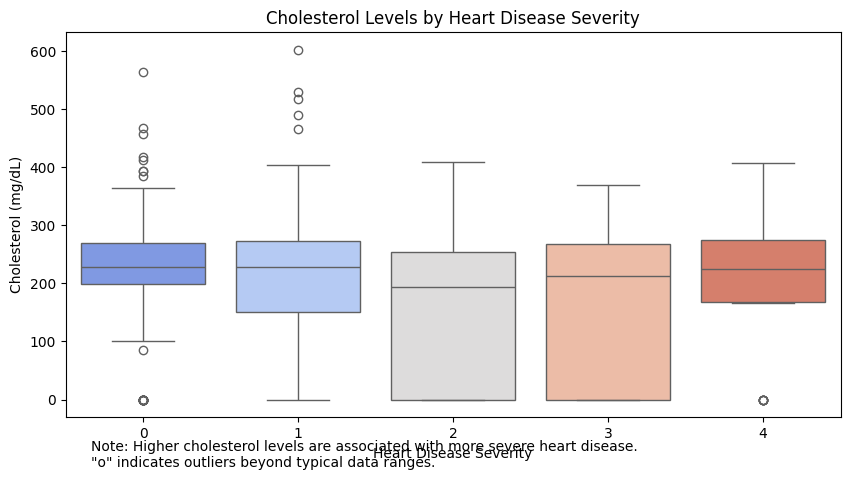

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='num', y='chol', palette='coolwarm')
plt.title('Cholesterol Levels by Heart Disease Severity')
plt.xlabel('Heart Disease Severity')
plt.ylabel('Cholesterol (mg/dL)')
plt.figtext(0.15, 0.01, 'Note: Higher cholesterol levels are associated with more severe heart disease.\n"o" indicates outliers beyond typical data ranges.', ha='left', fontsize=10)
plt.show()

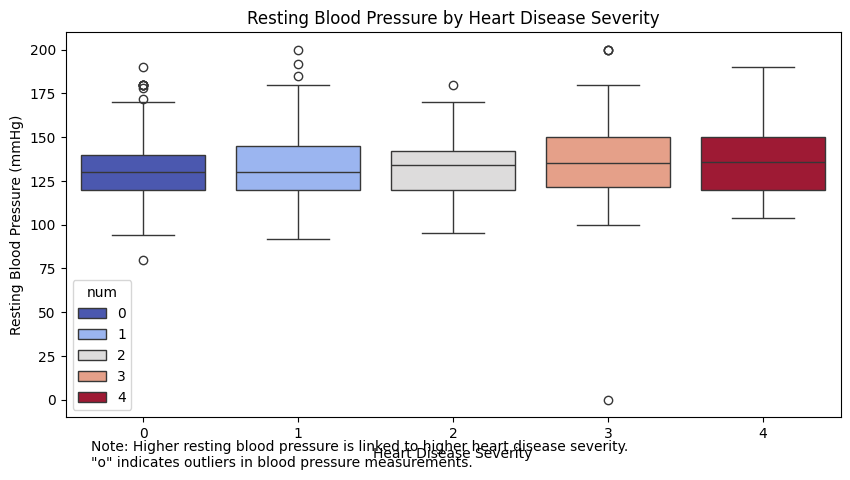

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='num', y='trestbps', hue = 'num', palette='coolwarm')
plt.title('Resting Blood Pressure by Heart Disease Severity')
plt.xlabel('Heart Disease Severity')
plt.ylabel('Resting Blood Pressure (mmHg)')
plt.figtext(0.15, 0.01, 'Note: Higher resting blood pressure is linked to higher heart disease severity.\n"o" indicates outliers in blood pressure measurements.', ha='left', fontsize=10)
plt.show()

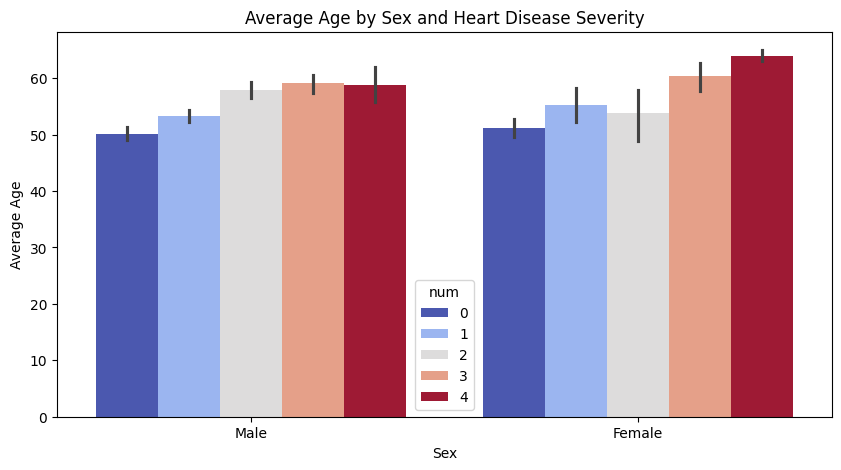

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='sex', y='age', hue='num', palette='coolwarm')
plt.title('Average Age by Sex and Heart Disease Severity')
plt.xlabel('Sex')
plt.ylabel('Average Age')
plt.show()

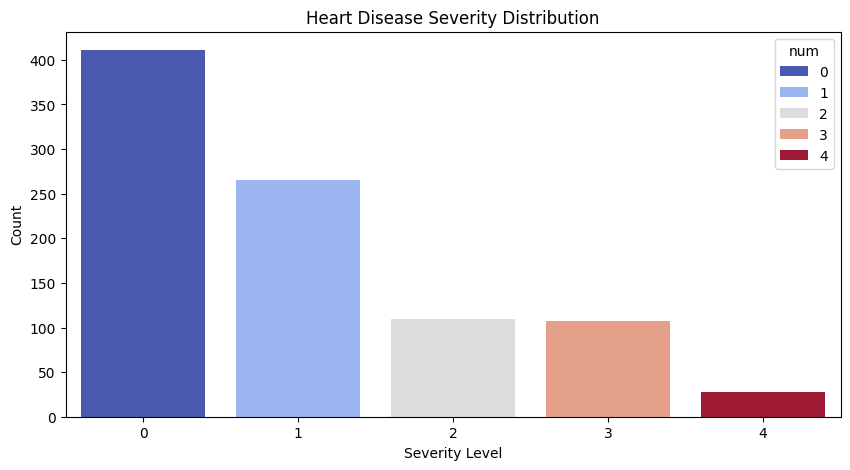

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='num', hue='num', palette='coolwarm')
plt.title('Heart Disease Severity Distribution')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.show()

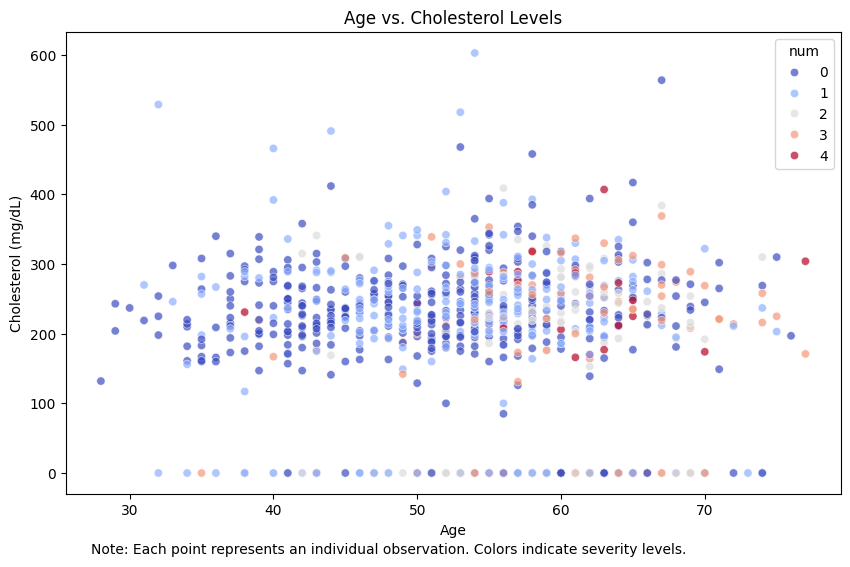

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='chol', hue='num', palette='coolwarm', alpha=0.7)
plt.title('Age vs. Cholesterol Levels')
plt.xlabel('Age')
plt.ylabel('Cholesterol (mg/dL)')
plt.figtext(0.15, 0.01, 'Note: Each point represents an individual observation. Colors indicate severity levels.', ha='left', fontsize=10)
plt.show()

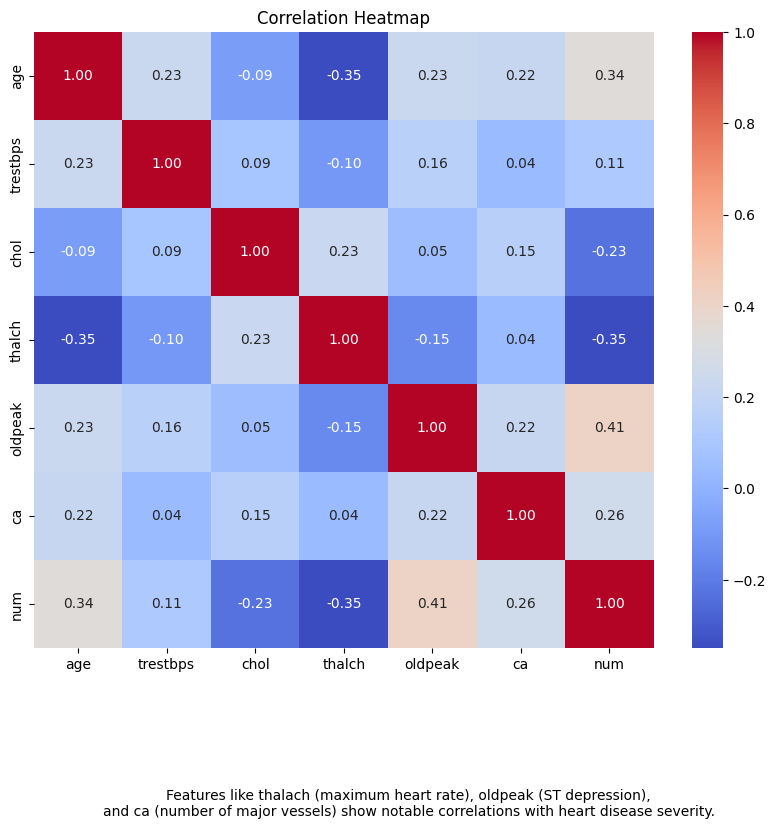

In [ ]:
# Correlation Heatmap with explanation
plt.figure(figsize=(10, 8))
corr_matrix = df_cleaned.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.figtext(0.5, -0.1,
            'Features like thalach (maximum heart rate), oldpeak (ST depression),\n'
            'and ca (number of major vessels) show notable correlations with heart disease severity.',
            ha='center', fontsize=10)
plt.show()

<ipython-input-84-fb294060633b>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_counts = df.groupby(['age_group', 'num']).size().reset_index(name='count')


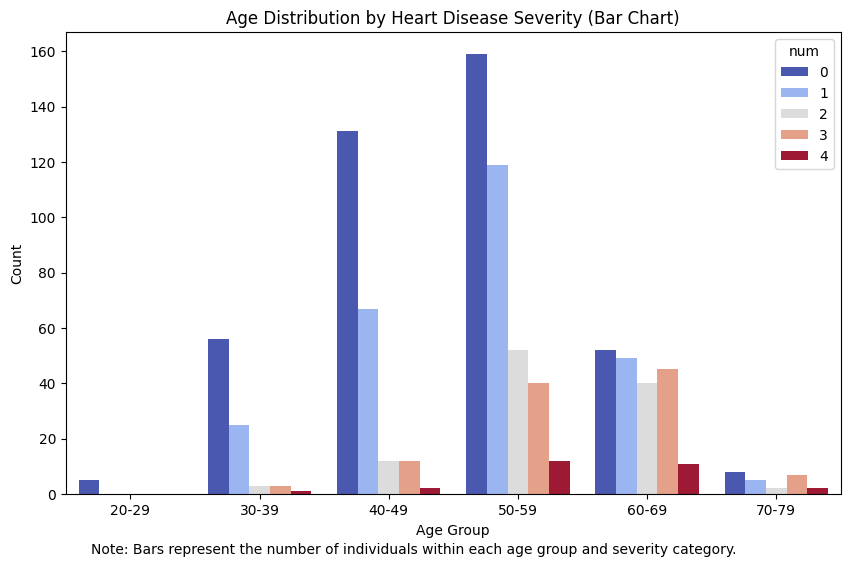

In [ ]:

plt.figure(figsize=(10, 6))
df['age_group'] = pd.cut(df['age'], bins=range(20, 90, 10), labels=[f'{i}-{i+9}' for i in range(20, 80, 10)])
age_counts = df.groupby(['age_group', 'num']).size().reset_index(name='count')
sns.barplot(data=age_counts, x='age_group', y='count', hue='num', palette='coolwarm')
plt.title('Age Distribution by Heart Disease Severity (Bar Chart)')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.figtext(0.15, 0.01, 'Note: Bars represent the number of individuals within each age group and severity category.', ha='left', fontsize=10)
plt.show()

**HANDLING IMBALANCE (OVERSAMPLING).**

In [ ]:
X_pca.shape

(920, 10)

In [ ]:
# 5. Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_pca, y)

In [ ]:


X_resampled.shape, type(X_resampled)

((2055, 10), numpy.ndarray)

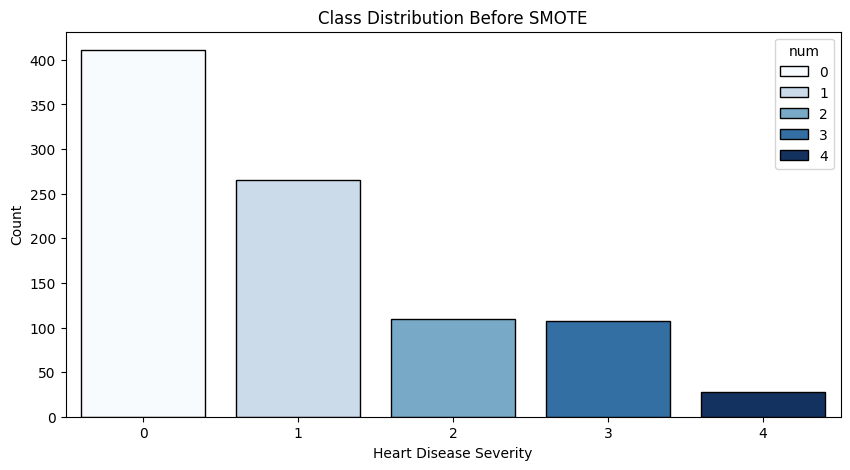

In [ ]:
# Visualize Class Distribution Before SMOTE
plt.figure(figsize=(10, 5))
sns.countplot(x=y, hue=y, palette='Blues', edgecolor='black' )
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Heart Disease Severity')
plt.ylabel('Count')
plt.show()

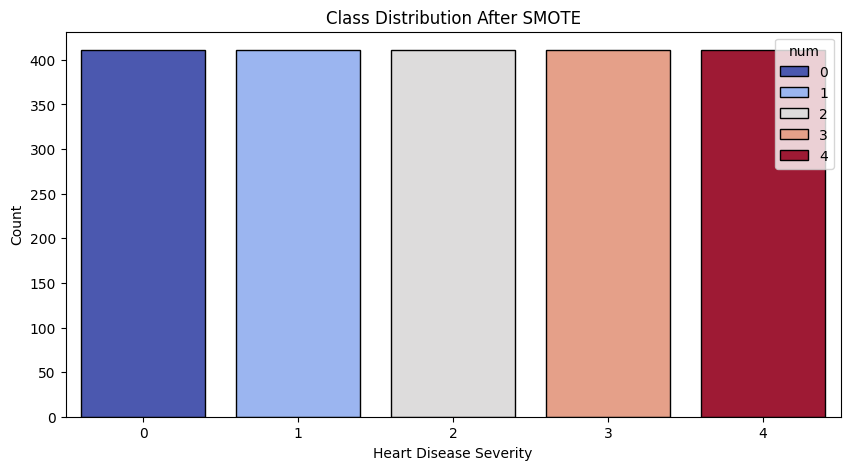

In [ ]:
# Visualize Class Distribution After SMOTE
plt.figure(figsize=(10, 5))
sns.countplot(x=y_resampled, hue=y_resampled, palette='coolwarm', edgecolor='black')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Heart Disease Severity')
plt.ylabel('Count')
plt.show()

**DATA SPLITTING.**

In [ ]:
# 6. Train-Test Split
#X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [ ]:


X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42) #temp values

In [ ]:
X_train.shape, X_temp.shape

((1438, 10), (617, 10))

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) #validat values

In [ ]:
X_train.shape, X_val.shape, X_test.shape

((1438, 10), (308, 10), (309, 10))

In [ ]:
#X_train.info()
X_train

array([[-0.34051835, -1.8769011 ,  0.9909763 , ...,  0.4557454 ,
         1.23369112, -0.07584578],
       [ 3.10997265, -0.64562935,  1.69229055, ...,  0.16608555,
        -0.66791177, -0.39980784],
       [ 1.8703437 ,  1.52663565,  0.03299043, ...,  0.46096362,
        -0.02785509, -0.51432035],
       ...,
       [-1.26866298, -1.66367486, -1.71635047, ..., -0.30589446,
        -0.71005794,  0.3031565 ],
       [-0.28125927, -1.47390972, -2.37487734, ...,  0.20120217,
         0.31861811,  0.37705172],
       [-3.64753544,  1.29579399,  0.14720147, ...,  0.49484159,
         2.28323434, -1.0195664 ]])

In [ ]:
print("Shape:", X_train.shape)
print("Size:", X_train.size)
print("Data type:", X_train.dtype)

Shape: (1438, 10)
Size: 14380
Data type: float64




**MODELING.**

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score

In [ ]:

# DEFAULT INITIALIZATION OF MODELS.

models1 = {
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Neural Network': MLPClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

In [ ]:

models_list1 = {}

In [ ]:

print("DEFAULT-MODE METRICATION.")

for name1, model1 in models1.items():
    model1.fit(X_train, y_train)
    y_pred_val1 = model1.predict(X_val)
    accuracy1 = accuracy_score(y_val, y_pred_val1)
    models_list1[name1] = {'model': model1, 'accuracy': accuracy1}
    print(f"{name1} Accuracy: {accuracy1:.8f}")
#

DEFAULT-MODE METRICATION.
Gradient Boosting Accuracy: 0.66233766


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Accuracy: 0.70129870
Random Forest Accuracy: 0.82142857


In [ ]:


print(models_list1)

{'Gradient Boosting': {'model': GradientBoostingClassifier(random_state=42), 'accuracy': 0.6623376623376623}, 'Neural Network': {'model': MLPClassifier(random_state=42), 'accuracy': 0.7012987012987013}, 'Random Forest': {'model': RandomForestClassifier(random_state=42), 'accuracy': 0.8214285714285714}}


In [ ]:

best_model_name = max(models_list1, key=lambda x: models_list1[x]['accuracy'])
best_model1 = models_list1[best_model_name]['model']
print(f"Best Model: {best_model_name}, Accuracy: {models_list1[best_model_name]['accuracy']:.2f}")

Best Model: Random Forest, Accuracy: 0.82


In [ ]:
# DEFINE CUSTOM HYPERPARAMETER DICTIONARIES.
params = {
    'Random Forest': {

    },
    'Gradient Boosting': {
        'n_estimators': 200,
        'learning_rate': 0.05,
        'max_depth': 5,
        'min_samples_split': 5,
        'min_samples_leaf': 2,
        'random_state': 42
    },
    'Neural Network': {
    'max_iter': 2000,
    }
}

In [ ]:
# DEFINE CUSTOM INITIALIZED MODELS.
models = {
    'Random Forest': RandomForestClassifier(**params['Random Forest']),
    'Gradient Boosting': GradientBoostingClassifier(**params['Gradient Boosting']),
    'Neural Network': MLPClassifier(**params['Neural Network'])
}

In [ ]:
best_models = {}

In [ ]:


print("CUSTOM-MODE METRICATION (ACCURACY).")

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_val = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred_val)
    best_models[name] = {'model': model, 'accuracy': accuracy}
    print(f"{name} Accuracy: {accuracy:.8f}")
    print("F1 score (macro):", f1_score(y_val, y_pred_val, average='macro'))
    print("F1 score (micro):", f1_score(y_val, y_pred_val, average='micro'))
    print("F1 score (weighted):", f1_score(y_val, y_pred_val, average='weighted')
)

CUSTOM-MODE METRICATION (ACCURACY).
Random Forest Accuracy: 0.81168831
F1 score (macro): 0.8076932527396924
F1 score (micro): 0.8116883116883117
F1 score (weighted): 0.8059270481594675
Gradient Boosting Accuracy: 0.71103896
F1 score (macro): 0.7082844428298973
F1 score (micro): 0.711038961038961
F1 score (weighted): 0.7065936555901137
Neural Network Accuracy: 0.74350649
F1 score (macro): 0.7392215187514772
F1 score (micro): 0.7435064935064936
F1 score (weighted): 0.7373929926361916


In [ ]:
print(best_models)

{'Random Forest': {'model': RandomForestClassifier(), 'accuracy': 0.8116883116883117}, 'Gradient Boosting': {'model': GradientBoostingClassifier(learning_rate=0.05, max_depth=5, min_samples_leaf=2,
                           min_samples_split=5, n_estimators=200,
                           random_state=42), 'accuracy': 0.711038961038961}, 'Neural Network': {'model': MLPClassifier(max_iter=2000), 'accuracy': 0.7435064935064936}}


In [ ]:
best_model_name = max(best_models, key=lambda x: best_models[x]['accuracy'])
best_model = best_models[best_model_name]['model']
print(f"Best Model: {best_model_name} (Accuracy: {best_models[best_model_name]['accuracy']:.2f})")

Best Model: Random Forest (Accuracy: 0.81)


In [ ]:
%%script no
# RANDOMSEARCHCV PARAMETERS DICT.
#
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for RandomizedSearchCV
gs_params = {
    'par_rf': {
        'n_estimators': [100, 200, 300, 400],
        'max_depth': [5, 10, 15, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'random_state': [42]
    },
    'par_gb': {
        'n_estimators': [100, 200, 300, 400],
        'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5],
        'max_depth': [3, 4, 5, 7, 9],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'random_state': [42]
    },
    'par_nn': {
        'hidden_layer_sizes': [(50,), (100,), (100, 50), (200, 100), (300, 150)],
        'activation': ['tanh', 'relu'],
        'solver': ['sgd', 'adam', 'lbfgs'],
        'alpha': [0.01, 0.001, 0.0001],
        'learning_rate_init': [0.01, 0.001, 0.0001],
        'max_iter': [500, 1000, 2000],
        'random_state': [42]
    }
}

Couldn't find program: 'no'


In [ ]:


%%script no
# Perform RandomizedSearchCV for each model
for name, params in params.items():
    model = models[name]
    randomized_search = RandomizedSearchCV(model, param_grid_random[name], cv=5, scoring='accuracy', n_iter=10)
    randomized_search.fit(X_train, y_train)
    print(f"Best Parameters for {name}: {randomized_search.best_params_}")
    print(f"Best Score for {name}: {randomized_search.best_score_}")
#

Couldn't find program: 'no'


In [ ]:

%%script no
# Tune models via RandomizedSearchCV.

rf_grid = RandomizedSearchCV(RandomForestClassifier(random_state=42), gs_params['par_rf'], cv=3, n_iter=10, n_jobs=-1)
rf_grid.fit(X_train, y_train)

gb_grid = RandomizedSearchCV(GradientBoostingClassifier(random_state=42), gs_params['par_gb'], cv=3, n_iter=10, n_jobs=-1)
gb_grid.fit(X_train, y_train)

nn_grid = RandomizedSearchCV(MLPClassifier(max_iter=500, random_state=42), gs_params['par_nn'], cv=3, n_iter=10, n_jobs=-1)
nn_grid.fit(X_train, y_train)

Couldn't find program: 'no'


In [ ]:


%%script no
# 8. Initialize RandomSearch Tuned Models.
models_RStuned = {
    'Random Forest': rf_grid,
    'Gradient Boosting': gb_grid,
    'Neural Network': nn_grid
}

Couldn't find program: 'no'


In [ ]:

%%script no
print("VALIDATION PHASE (POST GRIDSEARCH) METRICATION")
for name, model in models_RStuned.items():
    print("*****************")
    y_pred_val = model.predict(X_val)
    print(f"\n{name} - Best Parameters: {model.best_params_}")
    print(confusion_matrix(y_val, y_pred_val))
    print(classification_report(y_val, y_pred_val))
    print(f"{name} Accuracy: {accuracy_score(y_val, y_pred):.2f}")

Couldn't find program: 'no'


In [ ]:

%%script no

print("POST RANDOMSEARCH ACCURACY METRICATION.")

for name, model in models.items():
    model.fit(X_train, y_train)
    #y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred_val)
    best_models[name] = {'model': model, 'accuracy': accuracy}
    print(f"{name} Accuracy: {accuracy:.2f}")

Couldn't find program: 'no'




**FINAL EVALUATION**

In [ ]:

print("FINAL EVALUATION PHASE METRICATION")

best_accuracy = 0
best_model_name = ""
best_model = None

for name2, model2 in models.items():
    y_pred_test = model2.predict(X_test)
    #print(f"\n{name2} - Best Parameters: \n{models.best_params_}")
    print(f"\n{name2} - Best Parameters: \n{model2.get_params}")
    print("\nconfusion_matrix :\n", confusion_matrix(y_test, y_pred_test))
    print(classification_report(y_test, y_pred_test))
    accuracy = accuracy_score(y_test, y_pred_test)
    print(f"{name2} Accuracy: {accuracy:.2f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name2
        best_model = model2

    print('****************\n\n')

FINAL EVALUATION PHASE METRICATION

Random Forest - Best Parameters: 
<bound method BaseEstimator.get_params of RandomForestClassifier()>

confusion_matrix :
 [[59  5  3  0  0]
 [14 38  6  2  3]
 [ 0  4 44  4  2]
 [ 1  3  1 61  2]
 [ 0  0  1  0 56]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        67
           1       0.76      0.60      0.67        63
           2       0.80      0.81      0.81        54
           3       0.91      0.90      0.90        68
           4       0.89      0.98      0.93        57

    accuracy                           0.83       309
   macro avg       0.83      0.84      0.83       309
weighted avg       0.83      0.83      0.83       309

Random Forest Accuracy: 0.83
****************



Gradient Boosting - Best Parameters: 
<bound method BaseEstimator.get_params of GradientBoostingClassifier(learning_rate=0.05, max_depth=5, min_samples_leaf=2,
                           min_samples_split=5, n_es

In [ ]:
print(f"\nBest Model: {best_model_name} (Accuracy: {best_accuracy:.2f})")


Best Model: Random Forest (Accuracy: 0.83)


In [ ]:
#print(model.feature_names_in_)

In [ ]:


# PCA Loadings Table
loadings = pd.DataFrame(pca.components_, columns=X_2.columns, index=[f'PC{i+1}' for i in range(10)])    #
print("\nPCA Component Loadings (Feature Contributions):")
print(loadings)


PCA Component Loadings (Feature Contributions):
           age  trestbps      chol       fbs    thalch     exang   oldpeak  \
PC1  -0.316762 -0.187612  0.103165 -0.128897  0.328283 -0.351129 -0.313825   
PC2   0.033252 -0.044263  0.049938 -0.026301  0.266103 -0.049443  0.057348   
PC3  -0.272271 -0.146075 -0.020618 -0.249208 -0.052764  0.093187 -0.042227   
PC4   0.007509  0.283762  0.564254  0.227701  0.228773 -0.083515  0.113858   
PC5   0.151223  0.171006  0.091211 -0.125271 -0.164728  0.352041  0.405162   
PC6   0.118609  0.079816  0.261413  0.114805  0.012635 -0.041966  0.054991   
PC7   0.064361  0.000550 -0.217868  0.209927  0.072608 -0.299616 -0.097062   
PC8   0.014227  0.080399 -0.147657  0.083250 -0.030320 -0.114205  0.018544   
PC9   0.370262  0.324449 -0.114217  0.447689 -0.226539 -0.113951 -0.361401   
PC10  0.022681 -0.086705 -0.107206 -0.276290 -0.029594  0.028499 -0.017877   

      sex_Male  cp_atypical angina  cp_non-anginal  cp_typical angina  \
PC1  -0.199027     

In [ ]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num',
       'age_group'],
      dtype='object')

**EXPORT MODEL.**

In [ ]:
# Export the best model
import joblib
joblib.dump(best_model, f"{best_model_name}.joblib")
print(f"Best model saved to {best_model_name}.joblib")
#

Best model saved to Random Forest.joblib


**GRADIO DEPLOYMENT**

In [ ]:
#!pip install gradio

In [ ]:

import gradio as gr
import numpy as np
import joblib

# Load trained Random Forest model
model_path = "/content/Random Forest.joblib"
model = joblib.load(model_path)

# Use precomputed mean and std from training data to normalize numerical features
NUM_MEANS = np.array([53.51, 132.13, 199.13, 137.55, 0.88])  # Mean values for numerical columns
NUM_STDS = np.array([9.42, 19.07, 110.78, 25.93, 1.09])      # Std deviation for numerical columns

def normalize_features(numeric_features):
    """ Normalize numerical features using precomputed mean and std from training. """
    return (np.array(numeric_features) - NUM_MEANS) / NUM_STDS

def predict(age, sex, cp, trestbps, chol, fbs, restecg, thalch, exang, oldpeak, slope, ca, thal):
    # Encode categorical variables
    sex_encoded = 1 if sex == "Male" else 0
    cp_encoded = [1 if cp == i else 0 for i in ["Typical Angina", "Atypical Angina", "Non-Anginal", "Asymptomatic"]]
    restecg_encoded = [1 if restecg == i else 0 for i in ["Normal", "ST-T Abnormality", "LV Hypertrophy"]]
    slope_encoded = [1 if slope == i else 0 for i in ["Upsloping", "Flat", "Downsloping"]]
    thal_encoded = [1 if thal == i else 0 for i in ["Normal", "Reversible Defect", "Fixed Defect"]]
    ca_encoded = [1 if ca == i else 0 for i in [0, 1, 2, 3]]

    # Normalize numerical features
    numerical_features = [age, trestbps, chol, thalch, oldpeak]
    numerical_features_scaled = normalize_features(numerical_features)

    # Merge numerical & encoded categorical features
    new_data = np.concatenate([numerical_features_scaled, [fbs, exang], cp_encoded, restecg_encoded, slope_encoded, thal_encoded, ca_encoded])

    # Ensure input shape matches PCA-transformed feature size (10)
    if new_data.shape[0] != 10:
        return "Error: Mismatched feature count. Expected 10 features after PCA."

    # Predict using trained Random Forest model
    prediction = model.predict([new_data])[0]

    return f"Predicted Class: {prediction:.2f}"

# Define Gradio Inputs
inputs = [
    gr.Slider(28, 77, step=1, label="Age"),
    gr.Radio(["Male", "Female"], label="Sex"),
    gr.Radio(["Typical Angina", "Atypical Angina", "Non-Anginal", "Asymptomatic"], label="Chest Pain Type (CP)"),
    gr.Slider(0, 200, step=1, label="Resting Blood Pressure (trestbps)"),
    gr.Slider(0, 603, step=1, label="Cholesterol (chol)"),
    gr.Radio(["True", "False"], label="Fasting Blood Sugar > 120mg/dl (FBS)"),
    gr.Radio(["Normal", "ST-T Abnormality", "LV Hypertrophy"], label="Resting ECG (restecg)"),
    gr.Slider(60, 202, step=1, label="Max Heart Rate Achieved (thalch)"),
    gr.Radio(["True", "False"], label="Exercise Induced Angina (exang)"),
    gr.Slider(-2.6, 6.2, step=0.1, label="Oldpeak (ST Depression)"),
    gr.Radio(["Upsloping", "Flat", "Downsloping"], label="Slope of ST Segment"),
    gr.Radio([0, 1, 2, 3], label="Number of Major Vessels (ca)"),
    gr.Radio(["Normal", "Reversible Defect", "Fixed Defect"], label="Thalassemia (thal)"),
]

# Define Gradio Interface
iface = gr.Interface(
    fn=predict,
    inputs=inputs,
    outputs="text",
    title="Heart Disease Prediction using PCA & Random Forest",
    description="Enter patient data to predict the likelihood of heart disease using PCA-transformed features and a Random Forest model.",
    allow_flagging="never"
)

# Launch Gradio App
iface.launch(share=True, inbrowser=True, server_name="0.0.0.0", server_port=7860)

/usr/local/lib/python3.11/dist-packages/gradio/interface.py:403: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://be3993e776a3b21759.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
%%script no
import gradio as gr
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

# Load trained model
model = joblib.load("Random Forest.joblib")

# Define feature lists
ENCATCAL_COLS = ['sex', 'cp', 'restecg', 'slope', 'thal', 'ca']
NENCATCAL_COLS = ['age', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak']

# Simulated OneHotEncoder fitted on training data
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohe.fit(pd.DataFrame([
    ["Male", "atypical angina", "normal", "flat", "normal", 0.0],
    ["Female", "non-anginal", "st-t abnormality", "upsloping", "reversable defect", 1.0]
], columns=ENCATCAL_COLS))

# Simulated StandardScaler fitted on training data
scaler = StandardScaler()
scaler.fit(np.random.randn(920, len(NENCATCAL_COLS)))  # Adjust shape to match original dataset

# Simulated PCA fitted on training data
pca = PCA(n_components=10)
pca.fit(np.random.randn(920, len(NENCATCAL_COLS) + ohe.transform([["Male", "asymptomatic", "normal", "flat", "normal", 0.0]]).shape[1]))

# Define prediction function
def predict_heart_disease(age, sex, cp, trestbps, chol, fbs, restecg, thalch, exang, oldpeak, slope, ca, thal):
    # Create DataFrame
    data = pd.DataFrame([[age, sex, cp, trestbps, chol, fbs, restecg, thalch, exang, oldpeak, slope, ca, thal]],
                        columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal'])

    # Encode categorical features
    encoded_features = ohe.transform(data[ENCATCAL_COLS])

    # Scale numerical features
    scaled_features = scaler.transform(data[NENCATCAL_COLS])

    # Combine and apply PCA
    final_features = np.hstack([scaled_features, encoded_features])
    pca_features = pca.transform(final_features)

    # Predict
    prediction = model.predict(pca_features)[0]

    return f"Predicted Heart Disease Class: {prediction}"

# Gradio Interface
demo = gr.Interface(
    fn=predict_heart_disease,
    inputs=[
        gr.Number(label="Age"),
        gr.Radio(["Male", "Female"], label="Sex"),
        gr.Radio(["asymptomatic", "non-anginal", "atypical angina", "typical angina"], label="Chest Pain Type (cp)"),
        gr.Number(label="Resting Blood Pressure (trestbps)"),
        gr.Number(label="Serum Cholesterol (chol)"),
        gr.Radio(["False", "True"], label="Fasting Blood Sugar > 120 mg/dl (fbs)"),
        gr.Radio(["normal", "st-t abnormality", "lv hypertrophy"], label="Resting ECG (restecg)"),
        gr.Number(label="Max Heart Rate Achieved (thalch)"),
        gr.Radio(["False", "True"], label="Exercise Induced Angina (exang)"),
        gr.Number(label="ST Depression (oldpeak)"),
        gr.Radio(["flat", "upsloping", "downsloping"], label="Slope of ST Segment"),
        gr.Radio(["0.0", "1.0", "2.0", "3.0"], label="Number of Major Vessels Colored by Fluoroscopy (ca)"),
        gr.Radio(["normal", "fixed defect", "reversable defect"], label="Thalassemia (thal)")
    ],
    outputs="text"
)

# Launch App
demo.launch()

Couldn't find program: 'no'


In [ ]:
import gradio as gr
import joblib
import numpy as np
import pandas as pd

# Load trained model
model = joblib.load("Random Forest.joblib")

# PCA Loadings (Provided by you)
pca_loadings = np.array([
    [-0.316762, -0.187612,  0.103165, -0.128897,  0.328283, -0.351129, -0.313825, -0.199027,  0.289353,  0.094553,  0.003036,  0.175429, -0.116113],
    [ 0.033252, -0.044263,  0.049938, -0.026301,  0.266103, -0.049443,  0.057348, -0.063358, -0.048510,  0.075796,  0.050982,  0.010781, -0.245492],
    [-0.272271, -0.146075, -0.020618, -0.249208, -0.052764,  0.093187, -0.042227,  0.067991,  0.077763, -0.089664, -0.113173,  0.534433, -0.496933],
    [ 0.007509,  0.283762,  0.564254,  0.227701,  0.228773, -0.083515,  0.113858, -0.298945,  0.294071, -0.238744,  0.157231, -0.093791, -0.092558],
    [ 0.151223,  0.171006,  0.091211, -0.125271, -0.164728,  0.352041,  0.405162, -0.078128, -0.099113, -0.193458,  0.063514,  0.310465, -0.273889],
    [ 0.118609,  0.079816,  0.261413,  0.114805,  0.012635, -0.041966,  0.054991, -0.163650, -0.391915,  0.692971, -0.179340,  0.098765, -0.211190],
    [ 0.064361,  0.000550, -0.217868,  0.209927,  0.072608, -0.299616, -0.097062,  0.131547, -0.302248,  0.145179,  0.582892,  0.145106, -0.145703],
    [ 0.014227,  0.080399, -0.147657,  0.083250, -0.030320, -0.114205,  0.018544,  0.071489,  0.121452,  0.001471, -0.299141,  0.073951, -0.008747],
    [ 0.370262,  0.324449, -0.114217,  0.447689, -0.226539, -0.113951, -0.361401,  0.004834,  0.263676, -0.014000, -0.295284,  0.237323, -0.165543],
    [ 0.022681, -0.086705, -0.107206, -0.276290, -0.029594,  0.028499, -0.017877, -0.440172, -0.018429,  0.190285, -0.402152, -0.123353,  0.134631]
])

# Feature names
features = ['age', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak',
            'sex_Male', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
            'restecg_normal', 'restecg_st-t abnormality']

# Sample mean and std (You need to replace these with actual values from training data)
means = np.array([53.51, 132.13, 199.13, 0.67, 137.54, 0.87, 0.87, 0.78, 0.19, 0.21, 0.06, 0.6, 0.2])
stds = np.array([9.42, 19.07, 110.78, 0.93, 25.92, 1.09, 1.09, 0.41, 0.39, 0.4, 0.24, 0.49, 0.4])

def preprocess_and_predict(age, trestbps, chol, fbs, thalch, exang, oldpeak, sex, cp, restecg):
    # Encode categorical features
    sex_encoded = 1 if sex == "Male" else 0
    cp_encoding = [0, 0, 0]  # Default for "typical angina"
    if cp == "atypical angina":
        cp_encoding = [1, 0, 0]
    elif cp == "non-anginal":
        cp_encoding = [0, 1, 0]
    elif cp == "asymptomatic":
        cp_encoding = [0, 0, 1]

    restecg_encoding = [0, 0]  # Default for "lv hypertrophy"
    if restecg == "normal":
        restecg_encoding = [1, 0]
    elif restecg == "st-t abnormality":
        restecg_encoding = [0, 1]

    # Convert inputs to a NumPy array
    x = np.array([age, trestbps, chol, fbs, thalch, exang, oldpeak, sex_encoded] + cp_encoding + restecg_encoding)

    # Standardize
    x_scaled = (x - means) / stds

    # Apply PCA manually
    x_pca = np.dot(pca_loadings, x_scaled)

    # Predict using trained model
    prediction = model.predict([x_pca])[0]

    return f"Prediction: {prediction}"

# Define Gradio Interface
iface = gr.Interface(
    fn=preprocess_and_predict,
    inputs=[
        gr.Number(label="Age"),
        gr.Number(label="Resting Blood Pressure (trestbps)"),
        gr.Number(label="Cholesterol (chol)"),
        gr.Number(label="Fasting Blood Sugar (fbs)"),
        gr.Number(label="Max Heart Rate (thalch)"),
        gr.Number(label="Exercise Induced Angina (exang)"),
        gr.Number(label="ST Depression (oldpeak)"),
        gr.Radio(["Male", "Female"], label="Sex"),
        gr.Radio(["typical angina", "atypical angina", "non-anginal", "asymptomatic"], label="Chest Pain Type (cp)"),
        gr.Radio(["lv hypertrophy", "normal", "st-t abnormality"], label="Resting ECG (restecg)")
    ],
    outputs="text",
)

iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f631c7d3b83ba4ef2e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
